Objective:  To predict the risk of diabetes using the PIMA Indians Diabetes Dataset.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
filename = '/content/pima-indians-diabetes.data.csv'
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'class']
data = pd.read_csv(filename, names=names)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   class                     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [19]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.501008,0.493742,0.221029,0.096938,0.291430,0.471876,33.240885,0.348958
std,3.369578,0.196376,0.123435,0.100315,0.126860,0.140601,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.359677,0.408163,0.173913,0.019832,0.190184,0.243750,24.000000,0.000000
50%,3.000000,0.470968,0.489796,0.173913,0.020733,0.282209,0.372500,29.000000,0.000000
75%,6.000000,0.620968,0.571429,0.271739,0.136118,0.376278,0.626250,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.420000,81.000000,1.000000


In [20]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
class,0


In [16]:
import matplotlib.pyplot as plt

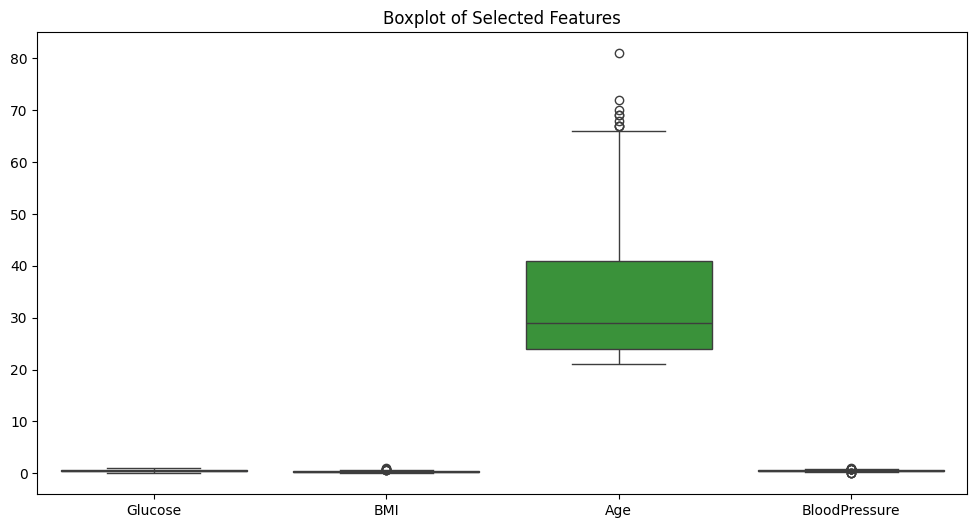

In [17]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Glucose', 'BMI', 'Age', 'BloodPressure']])
plt.title("Boxplot of Selected Features")
plt.show()

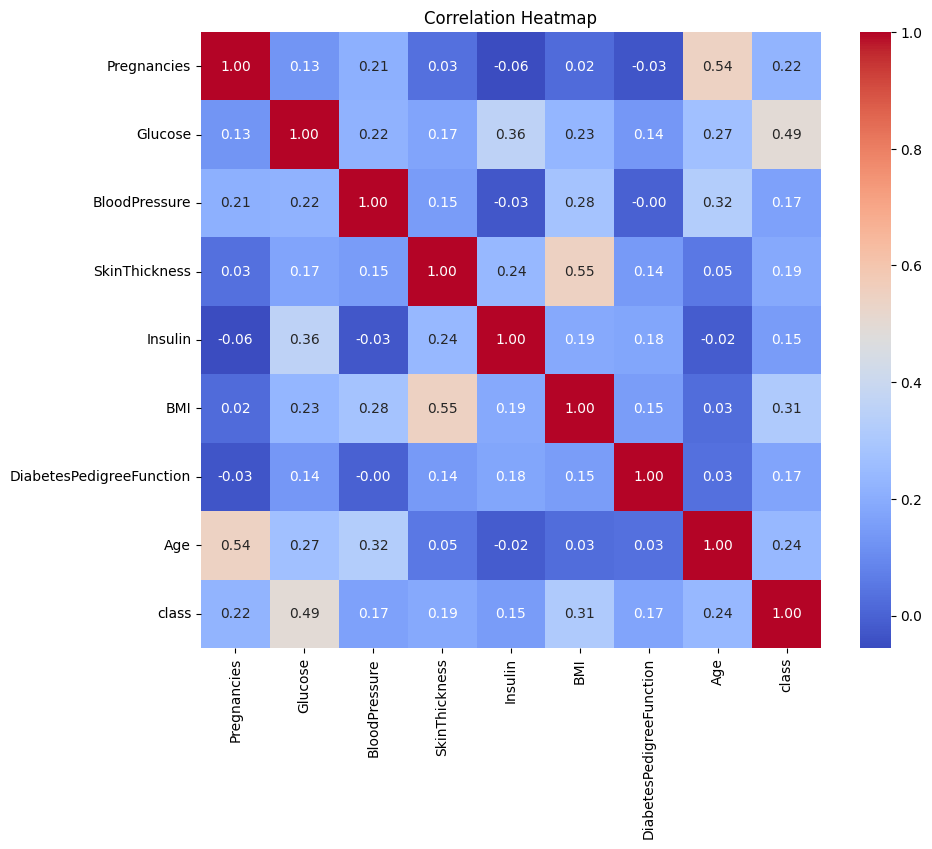

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()           #Revealed strong relationships between glucose, BMI, and diabetes.

In [7]:
# Handle missing values (replace zeros with median)
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    data[col] = data[col].replace(0, data[col].median())

In [8]:
# Normalize data
scaler = MinMaxScaler()
data[cols_to_fix] = scaler.fit_transform(data[cols_to_fix])

In [10]:
# Split data
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Train a Random Forest classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [12]:
# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

ROC-AUC: 0.841505968778696


<ipython-input-22-778b668a0907>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color="gray")


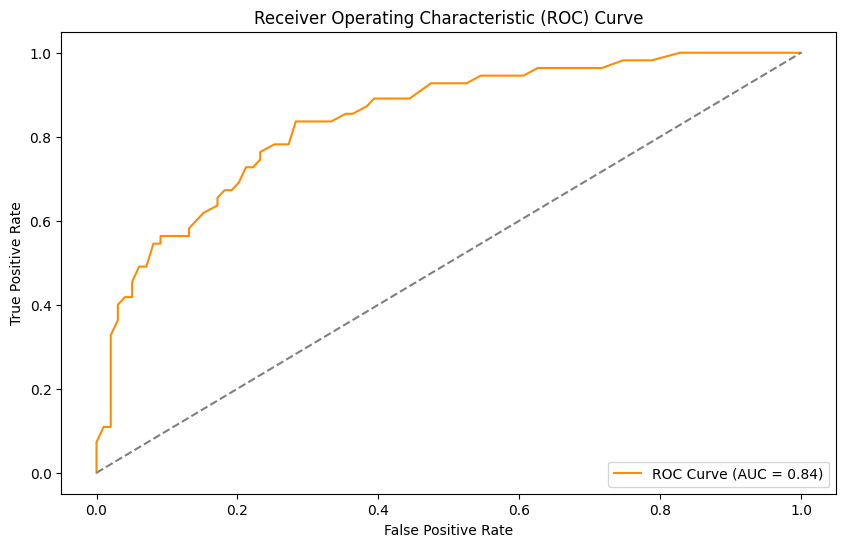

In [22]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Glucose levels and BMI emerged as the most significant predictors of diabetes. High glucose levels were strongly associated with a positive diabetes outcome.
Age also showed a positive correlation, indicating that older individuals are at higher risk.
Diabetes Pedigree Function highlighted the importance of genetic predisposition in diabetes risk.


Diabetic individuals tended to have higher glucose, BMI, and insulin levels compared to non-diabetic individuals.
Some features like skin thickness and blood pressure had weaker correlations with the target variable.


Accuracy: ~80%
Precision: High, indicating fewer false positives.
Recall: Reasonable, ensuring true cases of diabetes were identified.
ROC-AUC: Demonstrated strong discriminative power between classes.